### Synthetic Data

In [14]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

df = pd.DataFrame({"f1": X[:, 0], "f2": X[:, 1]})
df.head()

,f1,f2
0,0.494261,1.451067
1,-1.428081,-0.837064
2,0.338559,1.038759
3,0.119001,-1.053976
4,1.122425,1.774937


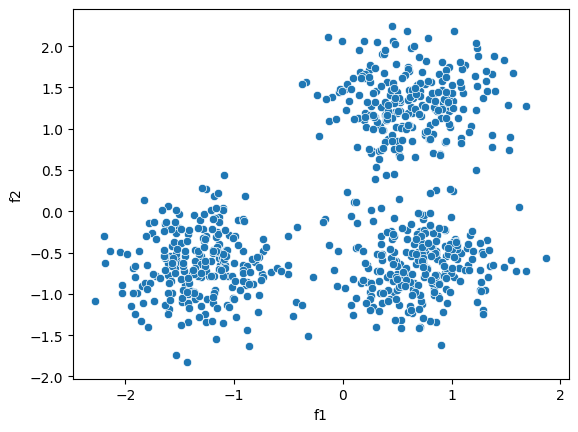

In [15]:
sns.scatterplot(df, x="f1", y='f2')
plt.show()

### DBSCAN

In [16]:
from sklearn.cluster import DBSCAN

ds = DBSCAN(eps=0.3, min_samples=10)
ds.fit(df[['f1', 'f2']])
ds.labels_

array([ 0,  1,  0,  2,  0,  1,  1,  2,  0,  0,  1,  1,  1,  2,  1,  0, -1,
        1,  1,  2,  2,  2,  2,  2,  1,  1,  2,  0,  0,  2,  0,  1,  1,  0,
        1,  0,  2,  0,  0,  2,  2,  1,  1,  1,  1,  1,  0,  2,  0,  1,  2,
        2,  1,  1,  2,  2,  1,  0,  2,  1,  2,  2,  2,  2,  2,  0,  2,  2,
        0,  0,  0,  2,  0,  0,  2,  1, -1,  1,  0,  2,  1,  1,  0,  0,  0,
        0,  1,  2,  1,  2,  2,  0,  1,  0,  1, -1,  1,  1,  0,  0,  2,  1,
        2,  0,  2,  2,  2,  2, -1,  0, -1,  1,  1,  1,  1,  0,  0,  1,  0,
        1,  2,  1,  0,  0,  1,  2,  1,  0,  0,  2,  0,  2,  2,  2,  0, -1,
        2,  2,  0,  1,  0,  2,  0,  0,  2,  2, -1,  2,  1, -1,  2,  1,  1,
        2,  2,  2,  0,  1,  0,  1,  0,  1,  0,  2,  2, -1,  1,  2,  2,  1,
        0,  1,  2,  2,  2,  1,  1,  2,  2,  0,  1,  2,  0,  0,  2,  0,  0,
        1,  0,  1,  0,  1,  1,  2,  2,  0,  0,  1,  1,  2,  1,  2,  2,  2,
        2,  0,  2,  0,  2,  2,  0,  2,  2,  2,  0,  0,  1,  1,  1,  2,  2,
        2,  2,  1,  2,  2

### Noise Points

In [17]:
list(ds.labels_).count(-1)

18

In [18]:
df['Cluster'] = ds.labels_
df.head()

,f1,f2,Cluster
0,0.494261,1.451067,0
1,-1.428081,-0.837064,1
2,0.338559,1.038759,0
3,0.119001,-1.053976,2
4,1.122425,1.774937,0


In [19]:
df.Cluster.value_counts()

Cluster
 2    245
 1    244
 0    243
-1     18
Name: count, dtype: int64

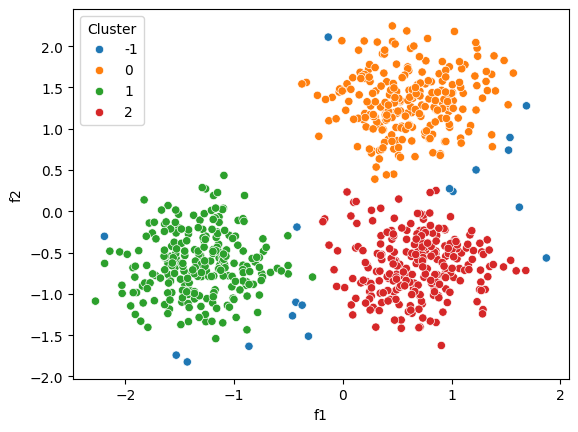

In [20]:
sns.scatterplot(df, x="f1", y='f2', palette="tab10", hue="Cluster")
plt.show()

### Customer Data

In [21]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_excel("income.xlsx", names=["name","age","income"])
df

,name,age,income
0,Rob,29,45
1,Andrea,50,80
2,Mohan,35,52
3,Michael,32,41
4,Kory,36,87
5,David,48,68
6,Ismail,31,80
7,Sheela,55,60


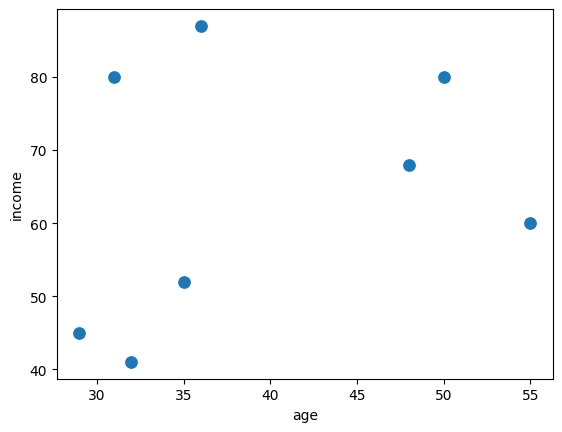

In [22]:
sns.scatterplot(df, x='age', y='income', s=100)
plt.show()

### DBSCAN Clustering

In [23]:
from sklearn.cluster import DBSCAN

ds = DBSCAN(eps=10, min_samples=2)
ds.fit(df[['age', 'income']])
ds.labels_

array([ 0, -1,  0,  0,  1, -1,  1, -1])

In [24]:
df["cluster"] = ds.labels_
df

,name,age,income,cluster
0,Rob,29,45,0
1,Andrea,50,80,-1
2,Mohan,35,52,0
3,Michael,32,41,0
4,Kory,36,87,1
5,David,48,68,-1
6,Ismail,31,80,1
7,Sheela,55,60,-1


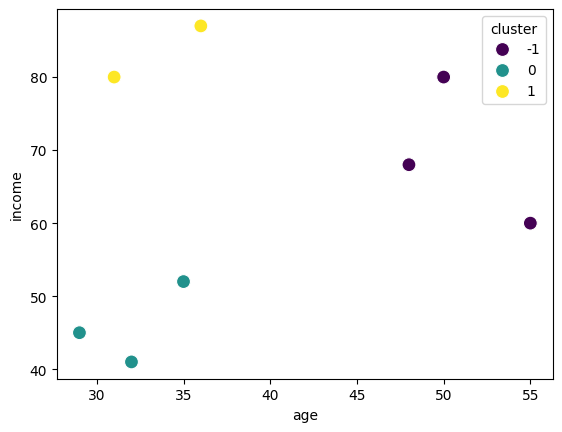

In [25]:
sns.scatterplot(df, x='age', y='income',  palette='viridis', s=100, hue="cluster")
plt.show()